# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Step 1 - Write code to Read data from dataset into pandas dataframe

In [42]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')


Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [43]:
# Print the first few rows and summary statistics of the dataset
print(diabetes_data.info())
print(diabetes_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1 

### Histograms for data sets

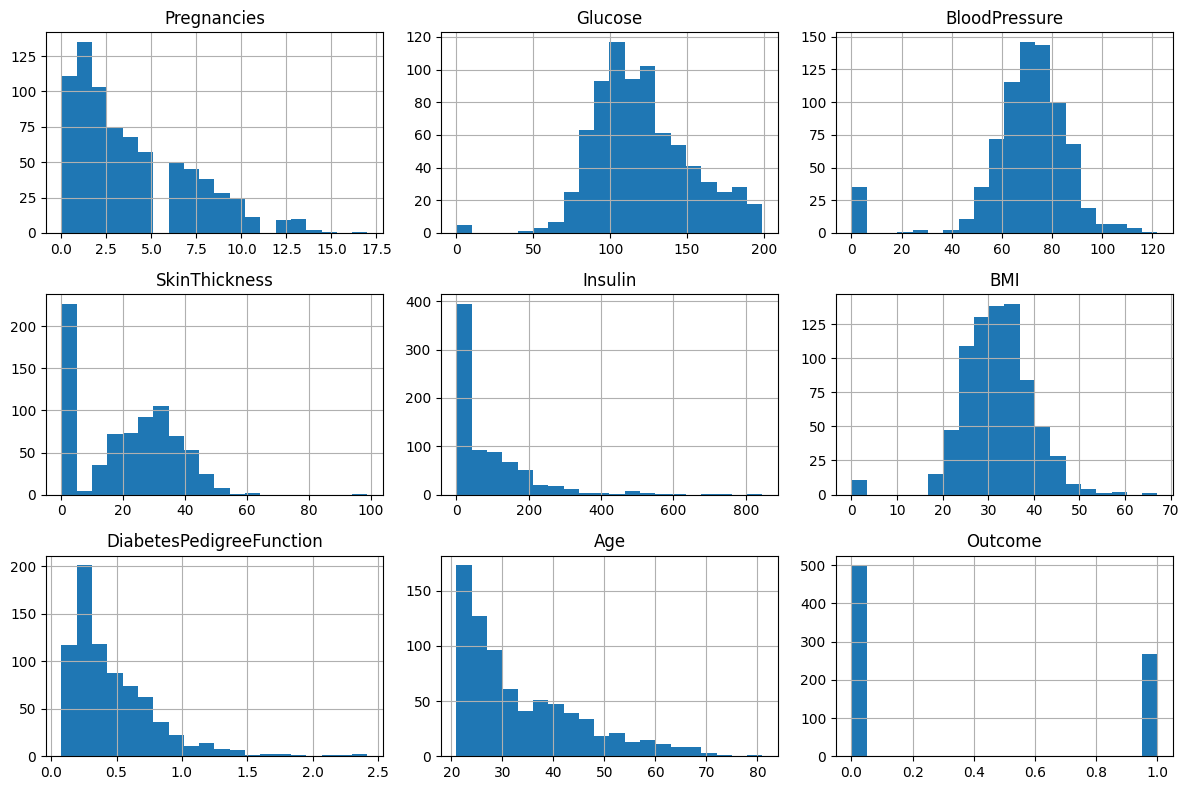

In [44]:
# Histogram for numerical features
diabetes_data.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

### Distribution of Outcome

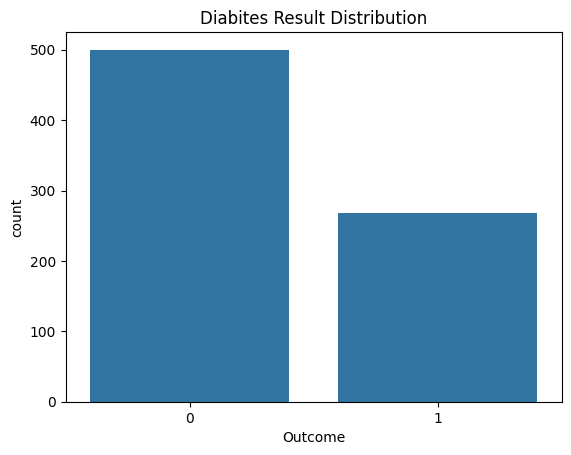

In [45]:
# Countplot for result
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Diabites Result Distribution')
plt.show()

### Create correlation matrix

In [46]:
# Correlation matrix
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<Axes: >

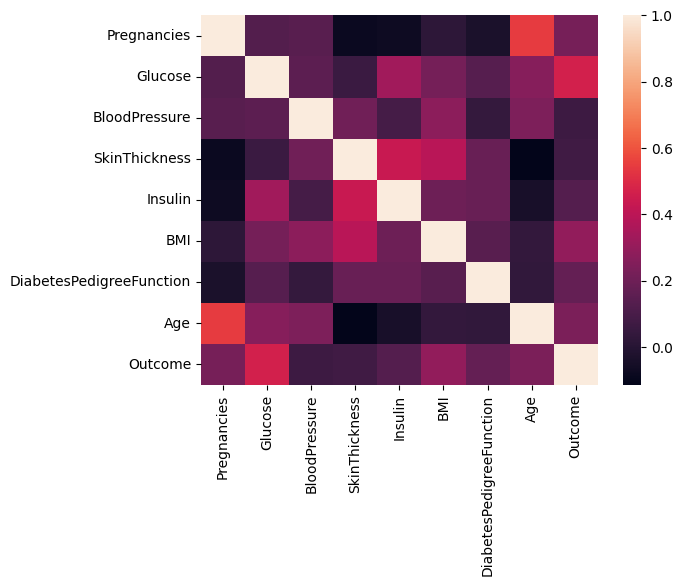

In [47]:
sns.heatmap(diabetes_data.corr())

Step 3 - Write code to remove Pregnancy column 

In [48]:
# Drop the 'Pregnancies' column
diabetes_data = diabetes_data.drop('Pregnancies', axis=1)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [49]:
print(diabetes_data.info())
print(diabetes_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None
(768, 8)


Step 5 - Write code to clean data

In [50]:
# Columns where 0 is likely an invalid value
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
diabetes_data[cols_with_zero_invalid] = diabetes_data[cols_with_zero_invalid].replace(0, np.nan)

# Impute missing values with median (more robust to outliers)
diabetes_data[cols_with_zero_invalid] = diabetes_data[cols_with_zero_invalid].fillna(diabetes_data[cols_with_zero_invalid].median())

# Check for any remaining missing values
print(diabetes_data.isnull().sum())


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [51]:
# Select features
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[feature_cols]
y = diabetes_data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Step #7: Initialize your model**




In [52]:
# Build a Gaussian Classifier
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [53]:
# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred = model.predict(X_test)

# Classification report
target_names = ['No diabetes', 'Has diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 No diabetes       0.82      0.82      0.82       109
Has diabetes       0.56      0.56      0.56        45

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



Step 9 - Predict using model on test data

In [54]:
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [55]:
# Find accuracy and F1 score
accuray = accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7402597402597403
F1 Score: 0.7402597402597403


Step 11 - Confusion Matrix

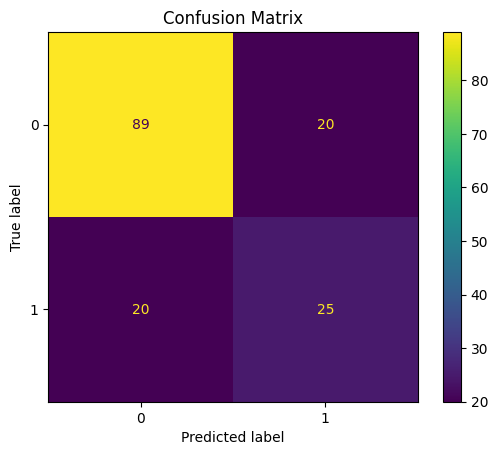

In [56]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()